## Introduction:

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

Competition Link ==>
https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [206]:
## data manipulation
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy import stats
## reading the data 
# import json
# import zipfile
import csv

## plotting .. 
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

## clustering 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

## Feature Selection 
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2



## warnings
import warnings
warnings.filterwarnings("ignore")

In [207]:
df = pd.read_csv('House_Predict.csv')

In [208]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [209]:
np.shape(df)

(1460, 81)

In [210]:
df.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

In [211]:
df.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
                 ...  
BedroomAbvGr     False
KitchenAbvGr     False
KitchenQual      False
TotRmsAbvGrd     False
Functional       False
Fireplaces       False
FireplaceQu       True
GarageType        True
GarageYrBlt       True
GarageFinish      True
GarageCars       False
GarageArea       False
GarageQual 

In [212]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

The total number of rows is 1460 .. the number of missing values in(PoolQC) is 1453 .. 

Hence, this coulmn is almost missing ! .. 

We can delete it safely !

In [213]:
df = df[df.columns.difference(['PoolQC'])]

In [214]:
np.shape(df)

(1460, 80)

Column deleted successfully .. 

Let's check the data type of each variable ..

In [215]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index([u'1stFlrSF', u'2ndFlrSF', u'3SsnPorch', u'BedroomAbvGr', u'BsmtFinSF1',
        u'BsmtFinSF2', u'BsmtFullBath', u'BsmtHalfBath', u'BsmtUnfSF',
        u'EnclosedPorch', u'Fireplaces', u'FullBath', u'GarageArea',
        u'GarageCars', u'GrLivArea', u'HalfBath', u'Id', u'KitchenAbvGr',
        u'LotArea', u'LowQualFinSF', u'MSSubClass', u'MiscVal', u'MoSold',
        u'OpenPorchSF', u'OverallCond', u'OverallQual', u'PoolArea',
        u'SalePrice', u'ScreenPorch', u'TotRmsAbvGrd', u'TotalBsmtSF',
        u'WoodDeckSF', u'YearBuilt', u'YearRemodAdd', u'YrSold'],
       dtype='object'),
 dtype('float64'): Index([u'GarageYrBlt', u'LotFrontage', u'MasVnrArea'], dtype='object'),
 dtype('O'): Index([u'Alley', u'BldgType', u'BsmtCond', u'BsmtExposure', u'BsmtFinType1',
        u'BsmtFinType2', u'BsmtQual', u'CentralAir', u'Condition1',
        u'Condition2', u'Electrical', u'ExterCond', u'ExterQual',
        u'Exterior1st', u'Exterior2nd', u'Fence', u'FireplaceQu', u'Fo

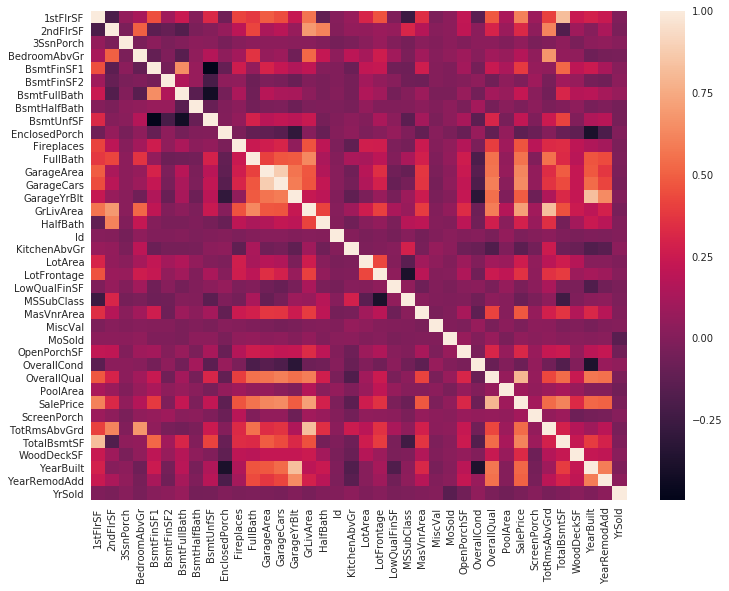

In [216]:
## heatmap
corr = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [217]:
np.corrcoef(df['TotalBsmtSF'], df['1stFlrSF'])  ## high correlation !

array([[ 1.        ,  0.81952998],
       [ 0.81952998,  1.        ]])

In [218]:
# corr = corr[corr.columns.difference(['SalePrice'])]
# corr

It is obvious that there is no perfect correlation between any of the variables .. This is perfect .. 

This means that each of them adds to the info. related to the dependent variable .. and each of them is important .. 

As mentioned in this tutorial ==> 
https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

The most sigificant variables are: 
1. GrLivArea
2. TotalBsmtSF
3. OverallQual
4. YearBuilt

let's check their correlation coeffecient values .. 

In [219]:
print np.corrcoef(df['GrLivArea'], df['TotalBsmtSF']), '\n'
print np.corrcoef(df['OverallQual'], df['TotalBsmtSF']), '\n'
print np.corrcoef(df['YearBuilt'], df['TotalBsmtSF'])

[[ 1.         0.4548682]
 [ 0.4548682  1.       ]] 

[[ 1.         0.5378085]
 [ 0.5378085  1.       ]] 

[[ 1.        0.391452]
 [ 0.391452  1.      ]]


The correlation between the last two variables is higher .. however, none of them is perfectly correlated .. GOOD!  ..

Instead of calculating the correlation for every pair of values .. let's update the heatmap above with the correlation values .. 
as proposed here ==>
https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

## Saleprice correlation matrix:

In [220]:
k = 10 #number of variables for heatmap
cols_ = corr.nlargest(k, 'SalePrice')['SalePrice'].index # positions of the variables that have largest correlation with the salesprice
cols_

Index([u'SalePrice', u'OverallQual', u'GrLivArea', u'GarageCars',
       u'GarageArea', u'TotalBsmtSF', u'1stFlrSF', u'FullBath',
       u'TotRmsAbvGrd', u'YearBuilt'],
      dtype='object')

In [221]:
cm = np.corrcoef(df[cols_].values.T)
cm

array([[ 1.        ,  0.7909816 ,  0.70862448,  0.6404092 ,  0.62343144,
         0.61358055,  0.60585218,  0.56066376,  0.53372316,  0.52289733],
       [ 0.7909816 ,  1.        ,  0.59300743,  0.60067072,  0.56202176,
         0.5378085 ,  0.47622383,  0.55059971,  0.42745234,  0.57232277],
       [ 0.70862448,  0.59300743,  1.        ,  0.46724742,  0.46899748,
         0.4548682 ,  0.56602397,  0.63001165,  0.82548937,  0.19900971],
       [ 0.6404092 ,  0.60067072,  0.46724742,  1.        ,  0.88247541,
         0.43458483,  0.43931681,  0.46967204,  0.36228857,  0.53785009],
       [ 0.62343144,  0.56202176,  0.46899748,  0.88247541,  1.        ,
         0.48666546,  0.48978165,  0.40565621,  0.33782212,  0.47895382],
       [ 0.61358055,  0.5378085 ,  0.4548682 ,  0.43458483,  0.48666546,
         1.        ,  0.81952998,  0.32372241,  0.28557256,  0.391452  ],
       [ 0.60585218,  0.47622383,  0.56602397,  0.43931681,  0.48978165,
         0.81952998,  1.        ,  0.38063749

Let's plot the above matrix on a heatmap .. 

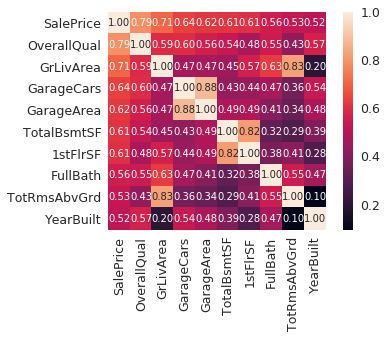

In [222]:
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols_.values, xticklabels=cols_.values)

- So far we plotted the highest 10 correlated variables with the price .. 

- OverallQual, GrLivArea and TotalBsmtSF are strongly correlated with SalesPrice .. 

- 'GarageCars' and 'GarageArea' are like twin brothers. You'll never be able to distinguish them (Multicollinearity). Therefore, we just need one of these variables in our analysis

## Splitting the data:
Let's split the data to train and test .. 

In [223]:
ntrain = (len(df)*80)/100
df_train, df_test = df[:ntrain], df[ntrain+1:]  ## 80-20 
df_train.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706,0,...,WD,0,Pave,8,856,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978,0,...,WD,0,Pave,6,1262,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486,0,...,WD,0,Pave,6,920,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216,0,...,WD,0,Pave,7,756,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655,0,...,WD,0,Pave,9,1145,AllPub,192,2000,2000,2008


In [224]:
np.shape(df_train)

(1168, 80)

## Variables Summary .. 

Calculate summary statistics for the numerical variables ..

In [225]:
df_train.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,1156.323630,339.430651,3.622432,2.851027,441.922945,46.098459,0.422089,0.062500,565.513699,21.715753,...,6.101027,0.993151,180590.277397,14.842466,6.485445,1053.535103,94.604452,1971.451199,1985.035959,2007.820205
std,373.780374,432.611639,30.077599,0.821768,436.121669,160.445795,0.521114,0.249142,443.468716,60.750643,...,1.378025,24.154883,78815.697902,54.357957,1.609141,419.122346,123.590373,29.951707,20.534722,1.318981
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,34900.000000,0.000000,2.000000,0.000000,0.000000,1875.000000,1950.000000,2006.000000
25%,882.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,223.750000,0.000000,...,5.000000,0.000000,129900.000000,0.000000,5.000000,796.000000,0.000000,1954.000000,1967.000000,2007.000000
50%,1086.000000,0.000000,0.000000,3.000000,384.000000,0.000000,0.000000,0.000000,469.000000,0.000000,...,6.000000,0.000000,162950.000000,0.000000,6.000000,1002.500000,0.000000,1973.000000,1994.000000,2008.000000
75%,1390.250000,721.750000,0.000000,3.000000,712.000000,0.000000,1.000000,0.000000,802.250000,0.000000,...,7.000000,0.000000,214000.000000,0.000000,7.000000,1299.750000,168.000000,2000.000000,2004.000000,2009.000000
max,3228.000000,1872.000000,508.000000,8.000000,2260.000000,1474.000000,3.000000,2.000000,2336.000000,552.000000,...,10.000000,648.000000,755000.000000,410.000000,14.000000,3206.000000,857.000000,2010.000000,2010.000000,2010.000000


## Target Variable .. 

SalePrice is the target variable .. let's give it more attention ..

In [226]:
df_train['SalePrice'].describe()

count      1168.000000
mean     180590.277397
std       78815.697902
min       34900.000000
25%      129900.000000
50%      162950.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Well, Minimum price is not equal zero !

Text(0,0.5,u'Frequency')

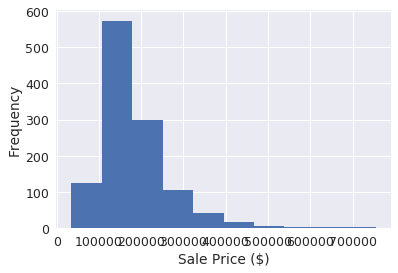

In [227]:
plt.hist(df_train['SalePrice'])
plt.xlabel('Sale Price ($)')
plt.ylabel('Frequency')

The selling price is devaited from the normal .. it's a +ve skewed ..
this means that the majority of the houses are sold by a price higher that $100,000

We have a selling peak at the interval between '$100,000' and '$200,000' (peakedness) 

Let's plot a more appealing histogram ..

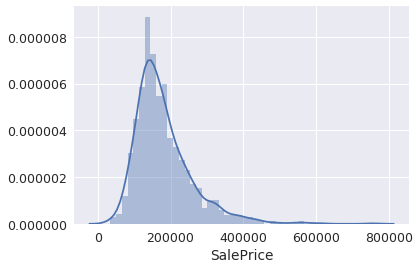

In [228]:
sns.distplot(df_train['SalePrice']) ##plot a univariate distribution of observations

sns.distplot()

Flexibly plot a univariate distribution of observations.

This function combines the matplotlib hist function (with automatic calculation of a good default bin size) with the seaborn kdeplot() and rugplot() functions. It can also fit scipy.stats distributions and plot the estimated PDF over the data.

Do we have any outliers ?!

{'boxes': [<matplotlib.lines.Line2D at 0x7fd4b797a0d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd4b797aa90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd4b79846d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fd4b79842d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd4b797a1d0>,
  <matplotlib.lines.Line2D at 0x7fd4b797a690>]}

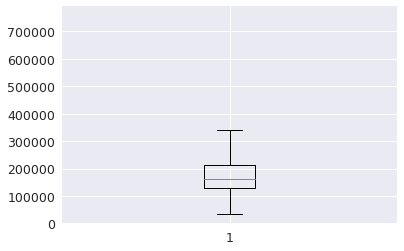

In [229]:
plt.boxplot(df_train['SalePrice'])

The boxplot as well confirms that the data is +ve skewed .. 

## Relationship between SalePrice and sign. vars:
We already highlight 4 most significant vars above .. let's explore the relationship between each of them and the depedent var.

In [230]:
GrLivArea_SalePrice = pd.concat([df_train['SalePrice'], df_train['GrLivArea']], axis = 1)
GrLivArea_SalePrice.head()

,SalePrice,GrLivArea
0,208500,1710
1,181500,1262
2,223500,1786
3,140000,1717
4,250000,2198


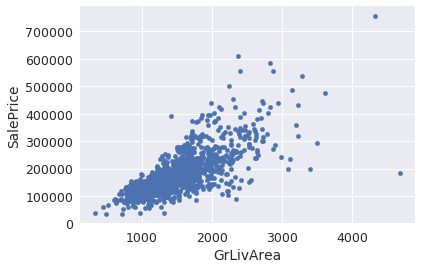

In [231]:
GrLivArea_SalePrice.plot.scatter(x = 'GrLivArea', y = 'SalePrice') ## we may add , ylim=(0,800000) as a 3rd parameter .. to limit 

WOW ! .. 
The two variables have +ve linear relationship (Directly correlated) .. 

In [232]:
TotalBsmtSF_SalePrice = pd.concat([df_train['SalePrice'], df_train['TotalBsmtSF']], axis = 1)
TotalBsmtSF_SalePrice.head()

,SalePrice,TotalBsmtSF
0,208500,856
1,181500,1262
2,223500,920
3,140000,756
4,250000,1145


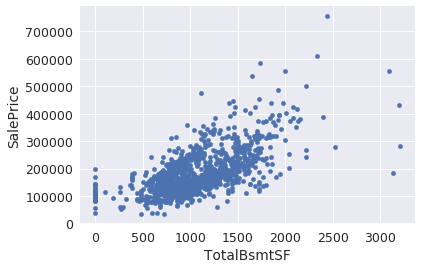

In [233]:
TotalBsmtSF_SalePrice.plot.scatter(x = 'TotalBsmtSF', y = 'SalePrice') ## we may add , ylim=(0,800000) as a 3rd parameter .. to limit 

It's also a linear relationship .. however, a more tending to be exponential .. 

At zero there is no relationship between them ..

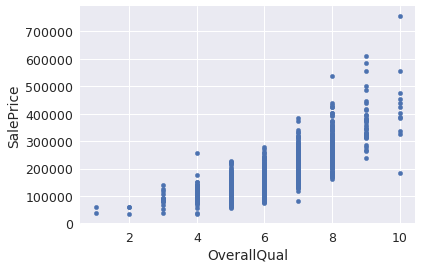

In [234]:
OverallQual_SalePrice = pd.concat([df_train['SalePrice'], df_train['OverallQual']], axis = 1)
OverallQual_SalePrice.plot.scatter(x = 'OverallQual', y = 'SalePrice') 

In [235]:
df_train['OverallQual'].head()

0    7
1    6
2    7
3    7
4    8
Name: OverallQual, dtype: int64

This variable contains discrete values .. 

It has no relationship with SalesPrice at each of its data points .. 

This variable represents (Overall material and finish quality) .. let's plot a boxplot at each of its values ..

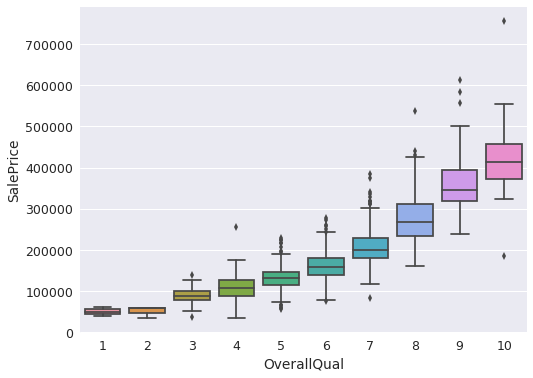

In [236]:
OverallQual_SalePrice_ = pd.concat([df_train['SalePrice'], df_train['OverallQual']], axis = 1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x = 'OverallQual', y = "SalePrice", data = OverallQual_SalePrice_)

Perfect :) ..

This is the distribution of values at every discrete value of OverallQual, there are outliers standing there .. especially at the value of 9 ..

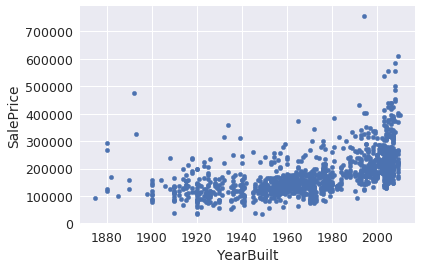

In [237]:
YearBuilt_SalePrice = pd.concat([df_train['SalePrice'], df_train['YearBuilt']], axis = 1)
YearBuilt_SalePrice.plot.scatter(x = 'YearBuilt', y = 'SalePrice') 

Also no linear relationship between SalePrice and YearBuilt ! ..

Let's do the same boxplots .. 

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107]), <a list of 108 Text xticklabel objects>)

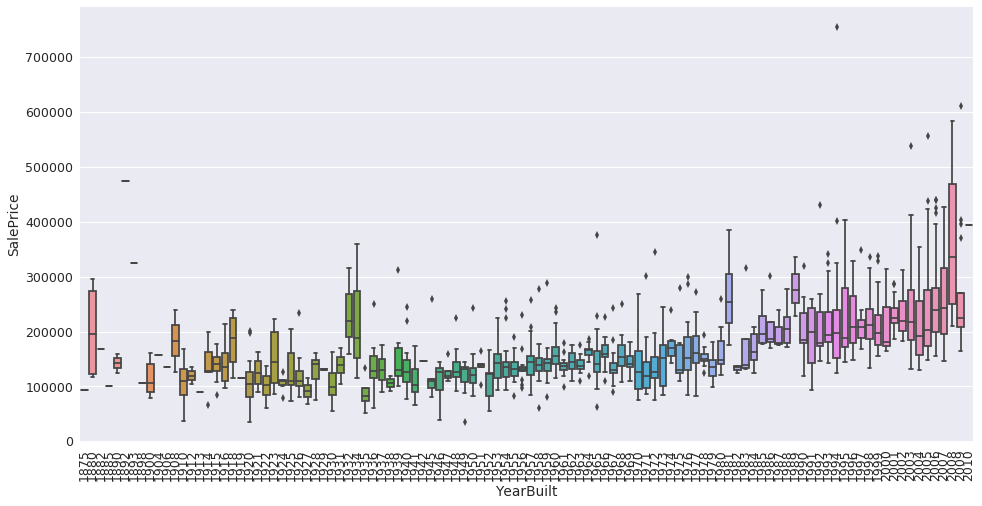

In [238]:
YearBuilt_SalePrice_ = pd.concat([df_train['SalePrice'], df_train['YearBuilt']], axis = 1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x = 'YearBuilt', y = "SalePrice", data = YearBuilt_SalePrice_)
plt.xticks(rotation=90)

Although it's not a strong tendency, someone might say that 'SalePrice' is more prone to spend more money in new stuff than in old relics ..

## Story Telling ..

Stories aside, we can conclude that:

    'GrLivArea' and 'TotalBsmtSF' seem to be linearly related with 'SalePrice'. Both relationships are positive, which means that as one variable increases, the other also increases. In the case of 'TotalBsmtSF', we can see that the slope of the linear relationship is particularly high.
    'OverallQual' and 'YearBuilt' also seem to be related with 'SalePrice'. The relationship seems to be stronger in the case of 'OverallQual', where the box plot shows how sales prices increase with the overall quality.


## SalesPrice and Correlated Variables .. 

Let's plot the salesprice with its top 10 correlated variables plotted above .. 

It is expected to be scatterplot ..  with all the correlated variables removed (any one of them is removed and the another one is plotted) 

In [239]:
k = 10 #number of variables for heatmap
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index # positions of the variables that have largest correlation with the salesprice
cols

Index([u'SalePrice', u'OverallQual', u'GrLivArea', u'GarageCars',
       u'GarageArea', u'TotalBsmtSF', u'1stFlrSF', u'FullBath',
       u'TotRmsAbvGrd', u'YearBuilt'],
      dtype='object')

In [240]:
## finding its top 10 .. 
cm = np.corrcoef(df_train[cols].values.T)
cm

array([[ 1.        ,  0.79399005,  0.73173952,  0.65402206,  0.64004469,
         0.63904528,  0.6162887 ,  0.5675864 ,  0.56470694,  0.53417069],
       [ 0.79399005,  1.        ,  0.60532431,  0.62232523,  0.57212229,
         0.54242779,  0.46941149,  0.55377729,  0.4442926 ,  0.56731286],
       [ 0.73173952,  0.60532431,  1.        ,  0.49813894,  0.4704111 ,
         0.42303914,  0.53937984,  0.63957655,  0.83336762,  0.22644431],
       [ 0.65402206,  0.62232523,  0.49813894,  1.        ,  0.88389607,
         0.45128042,  0.4503007 ,  0.47619701,  0.37688215,  0.54885802],
       [ 0.64004469,  0.57212229,  0.4704111 ,  0.88389607,  1.        ,
         0.4806012 ,  0.47830125,  0.40858693,  0.33830902,  0.49417287],
       [ 0.63904528,  0.54242779,  0.42303914,  0.45128042,  0.4806012 ,
         1.        ,  0.80497435,  0.33541039,  0.28106458,  0.40129026],
       [ 0.6162887 ,  0.46941149,  0.53937984,  0.4503007 ,  0.47830125,
         0.80497435,  1.        ,  0.38000836

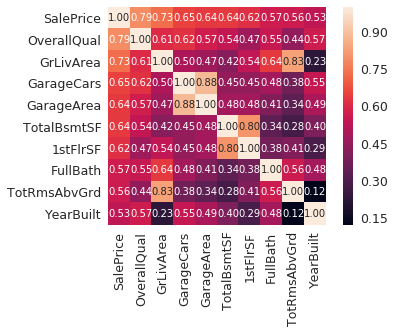

In [241]:
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

The dependancy is a little bit changed from plotting the heatmap on all the data and plotting it only on the training dataset ..

However, the high correlation between the variables and the salesprice still there .. and the values are a bit close to the old ones .. 

In [242]:
cols_ = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']

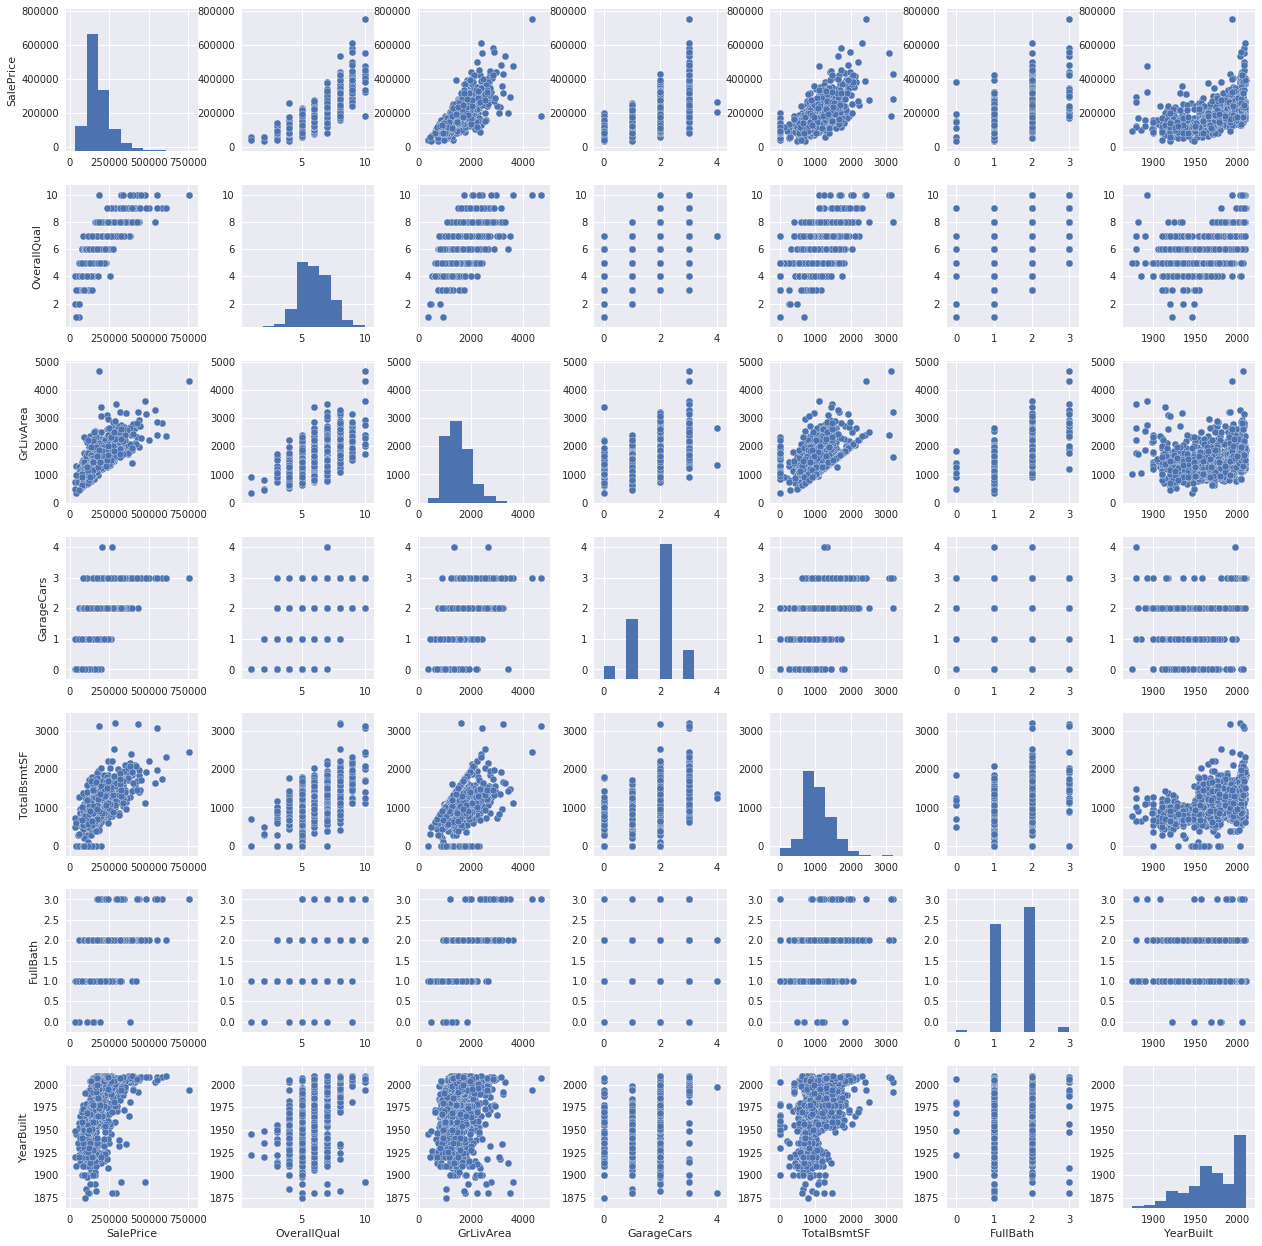

In [243]:
sns.set()  #To switch to seaborn defaults
sns.pairplot(df_train[cols_], size = 2.5)

Although some of the above figures are already plotted earlier .. 

This mega plot shows us a more clear and comprehensive relationships .. 

One of the figures we may find interesting is the one between 'TotalBsmtSF' and 'GrLiveArea'. In this figure we can see the dots drawing a linear line, which almost acts like a border. It totally makes sense that the majority of the dots stay below that line. Basement areas can be equal to the above ground living area, but it is not expected a basement area bigger than the above ground living area

The relationship between yearbuilt and salesprice is also interesting .. as it indicates an exponential distribution curve that tells that the prices tend to be higher over the years .. 

## Data Preprocessing: 

### 1. Handling Missing Data: 

Two important questions have to be asked: 
1. How prevalent is the missing data?
2. Is missing data random or does it have a pattern?

The answer to these questions is important for practical reasons because missing data can imply a reduction of the sample size. This can prevent us from proceeding with the analysis. Moreover, from a substantive perspective, we need to ensure that the missing data process is not biased and hidding an inconvenient truth.

The existance of missing data is already checked earlier and the variable of PoolQC is removed as its values are almost not there !

In our excellent notebook (https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python) .. they went extra mile by sorting the variables in descending order according to the number of missing values and calc. the percentage of these missing values .. 

In [244]:
total_missing = df_train.isnull().sum().sort_values(ascending=False)
total_missing.head()

MiscFeature    1122
Alley          1098
Fence           949
FireplaceQu     551
LotFrontage     206
dtype: int64

In [245]:
percent_missing = (df_train.isnull().sum()/df_train.isnull().count()*100).sort_values(ascending = False)
percent_missing.head()

MiscFeature    96.061644
Alley          94.006849
Fence          81.250000
FireplaceQu    47.174658
LotFrontage    17.636986
dtype: float64

about 96% of the values in MiscFeature variable are missing .. 

Let's combine both findings together .. 

In [246]:
missing_data = pd.concat([total_missing, percent_missing], axis = 1, keys = ['Total', 'Percentage'])
missing_data

,Total,Percentage
MiscFeature,1122,96.061644
Alley,1098,94.006849
Fence,949,81.250000
FireplaceQu,551,47.174658
LotFrontage,206,17.636986
GarageYrBlt,65,5.565068
GarageType,65,5.565068
GarageCond,65,5.565068
GarageFinish,65,5.565068
GarageQual,65,5.565068


The above table shows the top 7 variables with missing values .. 

i.e. MiscFeature has in total 1122 missing values that represent about 96% of its data .. 

## How we gonna deal with missing values .. 

- According to the refered notebook above, if the percentage of the missing value within the variable exceeds 15%, it should be deleted .. However, we have to dig deeper in each variable before removing it to above lossing valuable info. .. Looking at our variable above and applying this rule .. We gonna find that .. none of these variables seem to be very important, since most of them are not aspects in which we think about when buying a house (maybe that's the reason why data is missing?). Moreover, looking closer at the variables, we could say that variables like 'MiscFeature' and 'FireplaceQu' are strong candidates for outliers, so we'll be happy to delete them.

- 'GarageX' variables have the same number of missing data; most probably they belong to the same observations .. as they ALL have the same percentage of the missing value and according to our earlier choice to depend only on 'GarageCars' variable that has no missing values .. we gonna delete those 'GarageX' variables .. 

- The same logic applies to 'BsmtX' variables 

- 'MasVnrArea' and 'MasVnrType', have few number of missing values .. however, we can consider that these variables are not essential. Furthermore, they have a strong correlation with 'YearBuilt' and 'OverallQual' which are already considered (Check the above heatmap). Thus, we will not lose information if we delete 'MasVnrArea' and 'MasVnrType'.

In [247]:
df['Electrical'].isnull().sum()

1

Single observation is missing .. hence, we gonna delete it and keep the variable .. 

## Conclusion:

Let's delete all the variables with missing data, except the variable 'Electrical'. 

In 'Electrical' we'll just delete the observation with missing data.

In [248]:
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index, 1)
df_train.isnull().sum().sort_values(ascending = False).head()

YrSold       0
ExterCond    0
HeatingQC    0
Heating      0
HalfBath     0
dtype: int64

ALL the variables with missing values are now deleted .. 

In [249]:
df_train['Electrical'].isnull().sum()

0

mmm the missing value in Electrical is deleted !! :S  .. 

This is unexcepected .. :S .. 

Let's check the variable with the max. number of missing values as a double check ! :S 

In [250]:
df_train.isnull().sum().max() 

0

mmmm all variables not don't contain any missing values .. 

Let's check the number of variables in our data frame after removing ALL the variables with missing values ..

In [251]:
np.shape(df_train)

(1168, 63)

63 variables left .. 

## Outliers Detection:

Outliers is also something that we should be aware of. Why? Because outliers can markedly affect our models and can be a valuable source of information, providing us insights about specific behaviours.


### 1. Uni-variate analysis

We have to define a threshold that determines an observation as an outlier. To do so, we'll standardize the data. In this context, data standardization means converting data values to have mean of 0 and a standard deviation of 1.


In [257]:
np.shape(df_train['SalePrice'])

(1168,)

In [252]:
#standardizing data
# newaxis ==> to increase the dimension of one of the arrays so that numpy can broadcast.

SalesPrice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:, np.newaxis])
SalesPrice_scaled

array([[ 0.35426544],
       [ 0.01154735],
       [ 0.54466438],
       ..., 
       [ 0.66740823],
       [ 0.82201217],
       [-0.09634538]])

In [253]:
np.shape(SalesPrice_scaled)  # column vector

(1168, 1)

ALL what newaxis done is to convert (1168,) to (1168,1) array .. 

Reference ==> https://stackoverflow.com/questions/29241056/the-use-of-numpy-newaxis

In [260]:
low_range = SalesPrice_scaled[SalesPrice_scaled[:,0].argsort()][:10]
low_range

array([[-1.84928496],
       [-1.84406803],
       [-1.81120517],
       [-1.79343461],
       [-1.78454932],
       [-1.63223017],
       [-1.59415038],
       [-1.58154597],
       [-1.53068407],
       [-1.53068407]])

retrieve the first 10 low range values .. 

Luckily they are not far from 0 .. 

In [265]:
high_range = SalesPrice_scaled[SalesPrice_scaled[:,0].argsort()][-10:]
high_range

array([[ 3.44444024],
       [ 3.73701995],
       [ 3.86395257],
       [ 4.07766904],
       [ 4.5366955 ],
       [ 4.75248096],
       [ 4.77254901],
       [ 5.10704187],
       [ 5.47164315],
       [ 7.2911335 ]])

These are the highest 10 scaled values in SalePrice variable .. They are far from 0 (especially the value of 7.29) ..

Again, why 0, as our goal is to standardize the variable such that it has a mean of 0 

So far, we'll not consider any of these values as an outlier but we should be careful with the last value of (7.2911335)

### 2. Bi-variate analysis:

We gonna plot SalePrice variable with some other variables of interest .. we already did this exercice earlier .. but now we gonna look at it from another prespective .. 

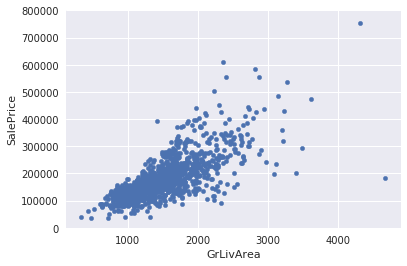

In [268]:
data = pd.concat([df_train['SalePrice'], df_train['GrLivArea']], axis=1)
data.plot.scatter(x = 'GrLivArea', y='SalePrice', ylim=(0,800000))

First of all, in this notebook (https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python) the scientist found 4 outliers .. and I just found 2 .. this is because we are working on different training datasets ! :S ..

However, we still apply his analysis and interpertation of our two outliers here .. 


- The value with bigger 'GrLivArea' (to the right bottom corner) seems strange and it is not following the crowd. We can speculate why this is happening. Maybe it refers to agricultural area and that could explain the low price. I'm not sure about this but I'm quite confident that these two points are not representative of the typical case. Therefore, we'll define it as an outlier and delete it.

- The observation in the top of the plot is the one with the value of (7.2911335) that we already talked about. it looks like a special case, however it seems to be following the trend. For that reason, we will keep it.

- Hence, as a conclusion .. that one to the right will be deleted and that top observation will be kept.

### 2.1. __GrLivArea vs SalePrice:

In [271]:
#deleting  the point ..

df_train.sort_values(by = 'GrLivArea', ascending = False)[:1]

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
523,3138,1538,0,3,1Fam,2260,0,1,0,878,...,New,0,Pave,11,3138,AllPub,208,2007,2008,2007


In [273]:
df['GrLivArea'][523]

4676

Yes it is :D ..

In [274]:
df_train = df_train.drop(df_train[df_train['Id'] == 523].index)

In [275]:
np.shape(df_train)

(1167, 63)

The number of rows decreased by 1 .. hence, the row of this observation is succesfully deleted .. 

### 2.2. __TotalBsmtSF vs SalePrice:

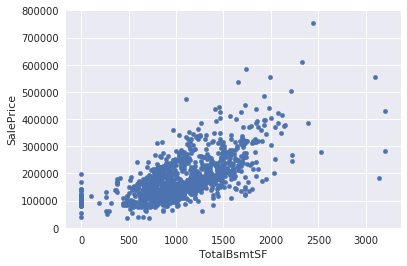

In [276]:
data = pd.concat([df_train['SalePrice'], df_train['TotalBsmtSF']], axis=1)
data.plot.scatter(x = 'TotalBsmtSF', y='SalePrice', ylim=(0,800000))

In the tutorial we are following he decided to do nothing with these outliers .. and did not remove any of them .. 

I think we may follow the same logic as even these 4 points to the right as far from the rest .. they still follow the trend or even not deviated a lot from it .. 

## Assumptions about "SalePrice":

As mentioned in this tutorial (https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python) .. there are some assumptions have to be taken into consideration:

1. Normality: 
   - This variable follows normal distribution 
   
2. Homoscedasticity: 
   - Dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s) .. 
   - This is because we want the error term to be the same across all values of the independent variables.
   
3. Linearity: 
   - Examine scatter plots and search for linear patterns.
   - If patterns are not linear, it would be worthwhile to explore data transformations. 
   
4. Absence of correlated errors: 
   - Happen when one error is correlated to another. 
   - If one positive error makes a negative error systematically, it means that there's a relationship between these variables. 
   - This occurs often in time series, where some patterns are time related. We'll also not get into this. 
   - However, if you detect something, try to add a variable (Confounding variable) that can explain the effect you're getting. 
    

### 1. Normality test:
For SalePrice variable .. 

This is done using:
1. Histogram
2. Normal Probability plot

((array([-3.24185118, -2.97999187, -2.83407736, ...,  2.83407736,
          2.97999187,  3.24185118]),
  array([ 34900,  35311,  37900, ..., 582933, 611657, 755000])),
 (74050.110250752754, 180608.77806341046, 0.93728524684834325))

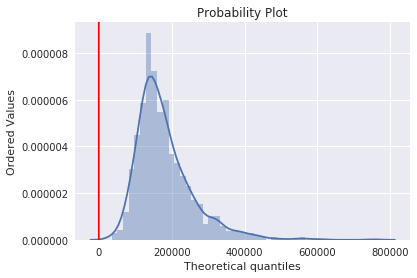

In [305]:
#histogram and normal probability plot
sns.distplot(df_train['SalePrice']) 
stats.probplot(df_train['SalePrice'], dist="norm", plot=plt)

The axes titles are added automatically ..  However, it's a little bit strange to have this red line on the left .. I already specify the shape of probability plot to be normal curve .. ! 

It is already normal here .. 

https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

and also in this guide .. https://stackoverflow.com/questions/13865596/quantile-quantile-plot-using-scipy

Is it because the shape of our training datasets are not alike ! :S

# Draft ! 

In [299]:
x = range(10)
x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

((array([-1.49876728, -0.98494667, -0.64703803, -0.37109819, -0.12121409,
          0.12121409,  0.37109819,  0.64703803,  0.98494667,  1.49876728]),
  array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])),
 (3.2809647849080048, 4.5, 0.99418049497752137))

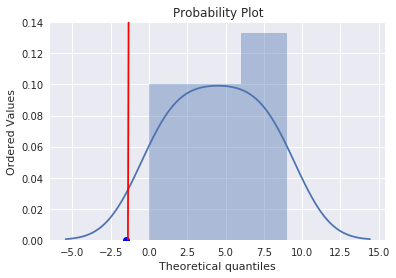

In [303]:
sns.distplot(x)
stats.probplot(x, plot=plt)

Same here ! :S .. 

Let's add this line to the figure .. 

((array([-3.24185118, -2.97999187, -2.83407736, ...,  2.83407736,
          2.97999187,  3.24185118]),
  array([ 34900,  35311,  37900, ..., 582933, 611657, 755000])),
 (74050.110250752754, 180608.77806341046, 0.93728524684834325))

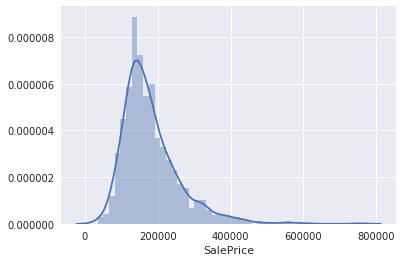

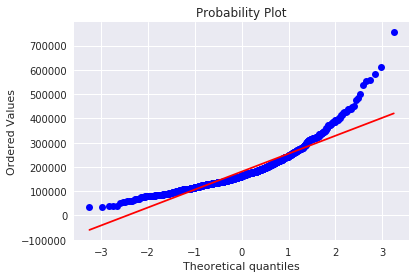

In [306]:
#histogram and normal probability plot
sns.distplot(df_train['SalePrice']) 
fig = plt.figure()
stats.probplot(df_train['SalePrice'], dist="norm", plot=plt)

Conclusion:

This black line in the mentioned notebook tutorial is just for demonestrating the shape of normal dist. 

however, the former plot is for SalePrice histogram and the 2nd one is for the probplot .. 

The resulted red line in the 1st trail (mistake) demonestrated the trend .. however, its shape vertical just bacause of the different scales ..  it indicates the normality of the variable .. 

Hence, 'SalePrice' is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line.

Data transformation can solve the problem; as in case of positive skewness, log transformations usually works well. 

In [308]:
## log tranformation to avoid positive skeweness .. 
df_train['SalePrice'] = np.log(df_train['SalePrice'])
df_train['SalePrice'].head()

0    2.505338
1    2.493950
2    2.510994
3    2.472277
4    2.520050
Name: SalePrice, dtype: float64

((array([-3.24185118, -2.97999187, -2.83407736, ...,  2.83407736,
          2.97999187,  3.24185118]),
  array([ 2.3475816 ,  2.34870024,  2.35543428, ...,  2.5859449 ,
          2.58956144,  2.60523999])),
 (0.033335661357897575, 2.4861746104360125, 0.99529728597470801))

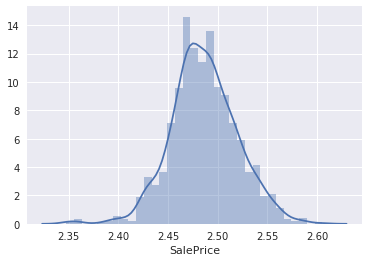

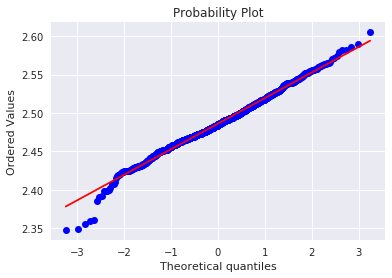

In [309]:
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice']) 
fig = plt.figure()
stats.probplot(df_train['SalePrice'], dist="norm", plot=plt)

OOOOH :D ..

It works well :) 

SalePrice now is normal .. 

## Let's check the normality of some other variables .. 


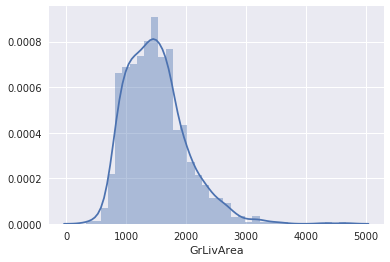

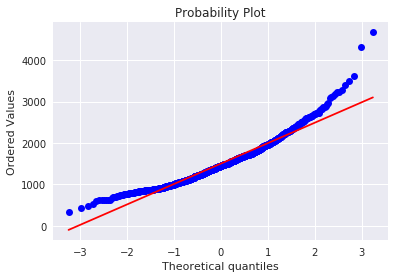

In [311]:
#histogram and normal probability plot
sns.distplot(df_train['GrLivArea'])
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

Not normal as well .. 

Luckily +ve skewed ! 

In [312]:
# variable transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

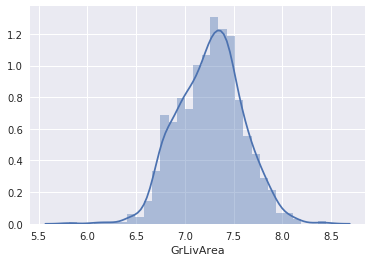

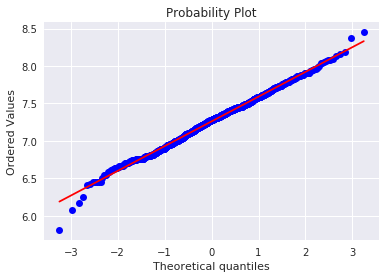

In [313]:
## transformed var plot ..
sns.distplot(df_train['GrLivArea'])
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

Done ! :)

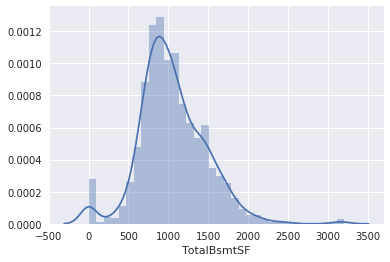

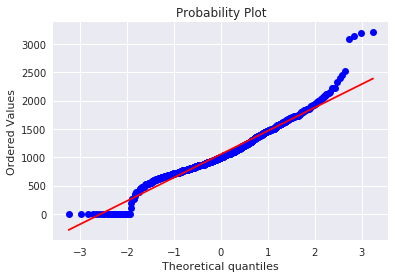

In [314]:
#histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'])
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

It is almost normal .. (y)